In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score




In [115]:
# read the dataset
data={"Marketing sales":[23,26,30,34,43,48],
      "Sales":[651,762,856,1063,1190,1298]
    
}
data=pd.DataFrame(data)
data

,Marketing sales,Sales
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


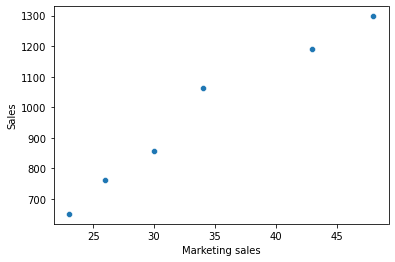

In [116]:
sns.scatterplot(data=data,x='Marketing sales',y='Sales')
plt.show()

In [117]:
sclaer=MinMaxScaler()
data[['Marketing sales','Sales']]= sclaer.fit_transform(data[['Marketing sales','Sales']])


In [118]:
data



,Marketing sales,Sales
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


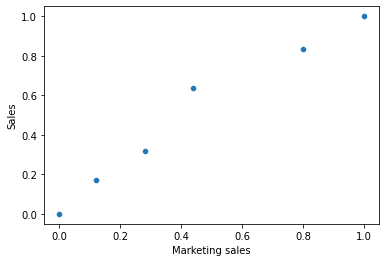

In [119]:
sns.scatterplot(data=data,x='Marketing sales',y='Sales')
plt.show()

# 
Building Model


In [120]:
X=data['Marketing sales'].values.reshape(-1,1)
y=data['Sales']

In [139]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [122]:
y_pred=reg.predict(X)

In [123]:
r2_score(y,y_pred)

0.9652190930694494

In [124]:
# calculate Residual sum square and Mean square error
rss=np.sum(np.square(y-y_pred))
print(rss)
mse=mean_squared_error(y,y_pred)
print(mse)

0.026808307381756883
0.004468051230292814


In [125]:
#root mean square 
rmse=mse**0.5
print(rmse)

0.06684348308019873


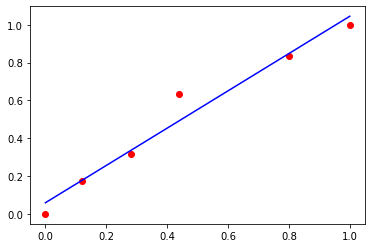

In [126]:
plt.scatter(X,y,color="r")
plt.plot(X,y_pred,color="b")

In [127]:
X=data['Marketing sales'].values.reshape(-1,1)

In [128]:
X

array([[0.  ],
       [0.12],
       [0.28],
       [0.44],
       [0.8 ],
       [1.  ]])

In [129]:
poly=PolynomialFeatures(3)
y1=poly.fit_transform(X)


In [130]:
y1

array([[1.      , 0.      , 0.      , 0.      ],
       [1.      , 0.12    , 0.0144  , 0.001728],
       [1.      , 0.28    , 0.0784  , 0.021952],
       [1.      , 0.44    , 0.1936  , 0.085184],
       [1.      , 0.8     , 0.64    , 0.512   ],
       [1.      , 1.      , 1.      , 1.      ]])

In [131]:
polyreg5=PolynomialFeatures(5)
X_poly5=polyreg5.fit_transform(X)
linear5=LinearRegression()
linear5.fit(X_poly5,y1)

LinearRegression()

In [132]:
X_poly5

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.20000000e-01, 1.44000000e-02, 1.72800000e-03,
        2.07360000e-04, 2.48832000e-05],
       [1.00000000e+00, 2.80000000e-01, 7.84000000e-02, 2.19520000e-02,
        6.14656000e-03, 1.72103680e-03],
       [1.00000000e+00, 4.40000000e-01, 1.93600000e-01, 8.51840000e-02,
        3.74809600e-02, 1.64916224e-02],
       [1.00000000e+00, 8.00000000e-01, 6.40000000e-01, 5.12000000e-01,
        4.09600000e-01, 3.27680000e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]])

In [133]:
X_seq=np.linspace(X.min(),X.max(),300).reshape(-1,1)
plt.figure()
X_seq.shape

(300, 1)

<Figure size 432x288 with 0 Axes>

In [134]:
print(X.shape)
print(y.shape)

(6, 1)
(6,)


In [135]:
y

0    0.000000
1    0.171561
2    0.316847
3    0.636785
4    0.833076
5    1.000000
Name: Sales, dtype: float64

ValueError: Found input variables with inconsistent numbers of samples: [300, 6]

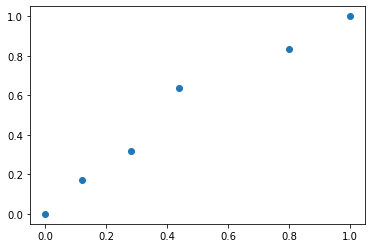

In [142]:
plt.figure()
plt.scatter(X,y)
A=reg.fit(X_seq,y)
#plt.plot(X_seq,linear5.predict(polyreg5.fit_transform(X)),color="b")
#plt.plot(X_seq,),color="r")